In [39]:
# JLCY 20210322

# based on 
# https://github.com/a2e-mmc/assessment/blob/
# study/coupling_comparison/studies/coupling_comparison/
# preprocessing/internal/wrf_to_sowfa.ipynb

import numpy as np
import matplotlib.pyplot as plt
import xarray
import pandas as pd
import sys

from mmctools.dataloaders import read_dir
from mmctools.wrf.utils import extract_column_from_wrfdata
from mmctools.coupling.sowfa import InternalCoupling
from mmctools.helper_functions import calc_wind
from mmctools.plotting import plot_timehistory_at_height, plot_profile

file_filter  = 'mmc_d02_*'
target_date = '2018-09-01'

# c1
site_latitude  = 36.6050
site_longitude = -97.485

# Define how WRF data is filtered to site specific data
# - 'interpolate': interpolate to site coordinates
# - 'nearest': use nearest WRF grid point
# - 'average': average of an area L_filter x Lfilter centred around the site
spatial_filter = 'interpolate'
L_filter = 0.0

def convert_xa_to_df(xa, target_date): 

    # Round timestamp to 10min
    xa['Time'] = xa['Time'].dt.round('10min')

    df = xa.to_dataframe().loc[:,['U10', 'V10', 'U', 
                                  'V', 'W', 'theta', 
                                  'T_TEND_ADV']].reset_index()
    df.rename(index=str, columns={"Time": "datetime"},inplace=True)
    df.set_index('datetime',inplace=True)

    df = df.loc[target_date]

    df['ws'], df['wd'] = calc_wind(df, 'U', 'V')
    df['ws10'], df['wd10'] = calc_wind(df, 'U10', 'V10')
    
    return df

## 0901 mynn

In [ ]:
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/'

In [3]:
%%time
# leads to error at restart times... 
xa = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_04:00:00
Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 655, in parse
    ret = self._build_naive(res, default)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1241, in _build_naive
    naive = default.replace(**repl)
ValueError: year 0 is out of range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_04:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_05:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_06:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_07:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_08:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_09:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_10:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_11:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_20:00:00
Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 655, in parse
    ret = self._build_naive(res, default)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1241, in _build_naive
    naive = default.replace(**repl)
ValueError: year 0 is out of range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_21:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_22:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_23:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-02_00:00:00
CPU times: user 2min 29s, sys: 1min 45s, total: 4min 15s
Wall time: 9min 3s


In [73]:
xa.to_dataframe().head()

U10       V10          T2         TSK  \
Time                height                                               
2018-08-31 12:00:00 0.0     0.031754  5.936772  297.678113  297.152345   
                    5.0     0.031754  5.936772  297.678113  297.152345   
                    10.0    0.031754  5.936772  297.678113  297.152345   
                    15.0    0.031754  5.936772  297.678113  297.152345   
                    20.0    0.031754  5.936772  297.678113  297.152345   

                               UST         PSFC  HFX   LH  MUU  MUV  ...  \
Time                height                                           ...   
2018-08-31 12:00:00 0.0     0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   
                    5.0     0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   
                    10.0    0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   
                    15.0    0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   
                    20.0    0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   

                            RU_TEND_ADV  RU_TEND_PGF  RU_TEND_COR  \
Time                height                                          
2018-08-31 12:00:00 0.0             0.0          0.0          0.0   
                    5.0             0.0          0.0          0.0   
                    10.0            0.0          0.0          0.0   
                    15.0            0.0          0.0          0.0   
                    20.0            0.0          0.0          0.0   

                            RU_TEND_PHYS  RV_TEND  RV_TEND_ADV  RV_TEND_PGF  \
Time                height                                                    
2018-08-31 12:00:00 0.0              0.0      0.0          0.0          0.0   
                    5.0              0.0      0.0          0.0          0.0   
                    10.0             0.0      0.0          0.0          0.0   
                    15.0             0.0      0.0          0.0          0.0   
                    20.0             0.0      0.0          0.0          0.0   

                            RV_TEND_COR  RV_TEND_PHYS  T_TEND_ADV  
Time                height                                         
2018-08-31 12:00:00 0.0             0.0           0.0         0.0  
                    5.0             0.0           0.0         0.0  
                    10.0            0.0           0.0         0.0  
                    15.0            0.0           0.0         0.0  
                    20.0            0.0           0.0         0.0  

[5 rows x 26 columns]

In [40]:
df = convert_xa_to_df(xa, target_date)

<AxesSubplot:xlabel='datetime'>

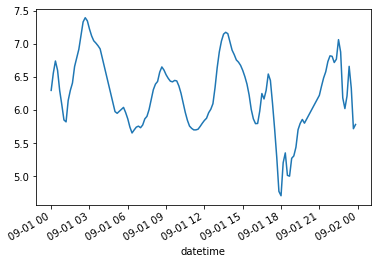

In [23]:
df.loc[df['height'] == 10]['ws10'].plot()

<AxesSubplot:xlabel='datetime'>

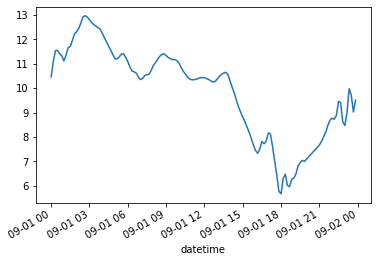

In [24]:
df.loc[df['height'] == 80]['ws'].plot()

<AxesSubplot:xlabel='datetime'>

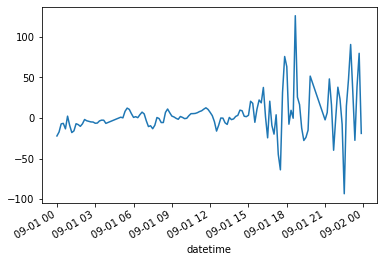

In [7]:
df.loc[df['height'] == 80]['T_TEND_ADV'].plot()

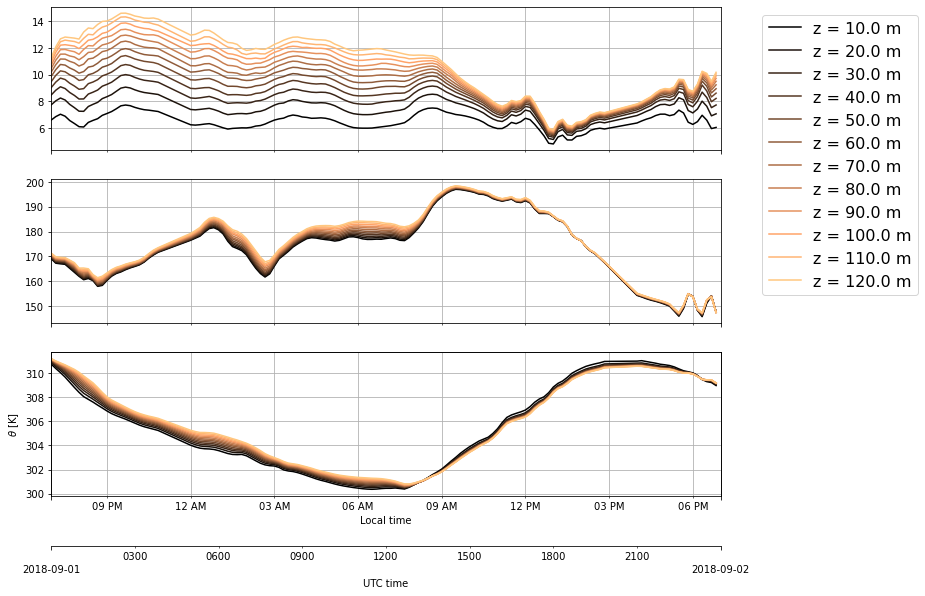

In [35]:
fig, ax, ax2 = plot_timehistory_at_height(
    df,
    fields=['ws', 'wd', 'theta'],
    heights=np.linspace(10,120,12),
    cmap='copper',
    timelimits=['2018-09-01 00:00', '2018-09-02 00:00'],
#     fieldlimits={'ws':(4,15), 'wd':(180,240)},
    plot_local_time=True,
    local_time_offset=-5
)

# plt.savefig('plots/02/ws_ts.pdf')

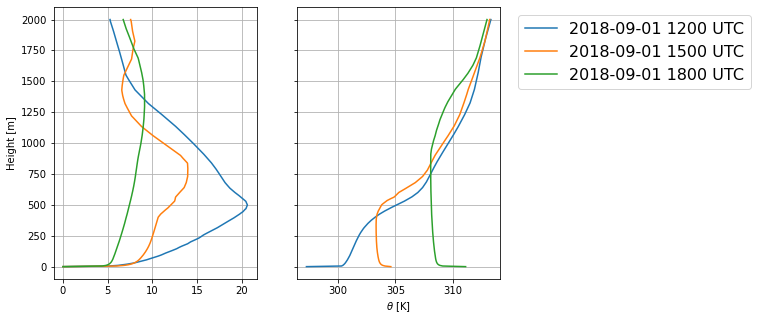

In [33]:
fig,ax = plot_profile(
    df,
    fields=['ws', 'theta'],
    times=['2018-09-01 12:00', '2018-09-01 15:00', '2018-09-01 18:00'],
    fieldlabels={'theta':r'$\theta$ [K]'},
    showlegend=True
)

## 0901 edmf

In [37]:
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/'

In [38]:
%%time
# leads to error at restart times... 
xa_0901e = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_04:00:00
Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 655, in parse
    ret = self._build_naive(res, default)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1241, in _build_naive
    naive = default.replace(**repl)
ValueError: year 0 is out of range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_04:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_05:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_06:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_07:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_08:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_09:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_10:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_11:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_18:00:00
Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 655, in parse
    ret = self._build_naive(res, default)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1241, in _build_naive
    naive = default.replace(**repl)
ValueError: year 0 is out of range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_21:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_22:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_23:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-02_00:00:00
CPU times: user 2min 28s, sys: 1min 44s, total: 4min 13s
Wall time: 9min 13s


In [41]:
df_0901e = convert_xa_to_df(xa_0901e, target_date)

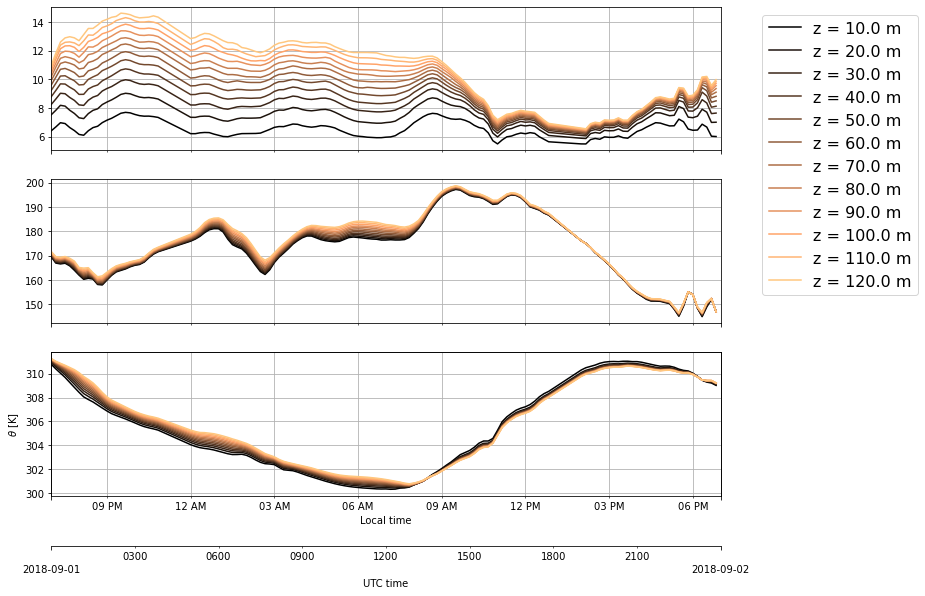

In [42]:
fig, ax, ax2 = plot_timehistory_at_height(
    df_0901e,
    fields=['ws', 'wd', 'theta'],
    heights=np.linspace(10,120,12),
    cmap='copper',
    timelimits=['2018-09-01 00:00', '2018-09-02 00:00'],
#     fieldlimits={'ws':(4,15), 'wd':(180,240)},
    plot_local_time=True,
    local_time_offset=-5
)

x and y must have same first dimension, but have shapes (0, 401) and (401,) -- 2018-09-01 18:00 not found in index?
x and y must have same first dimension, but have shapes (0, 401) and (401,) -- 2018-09-01 18:00 not found in index?


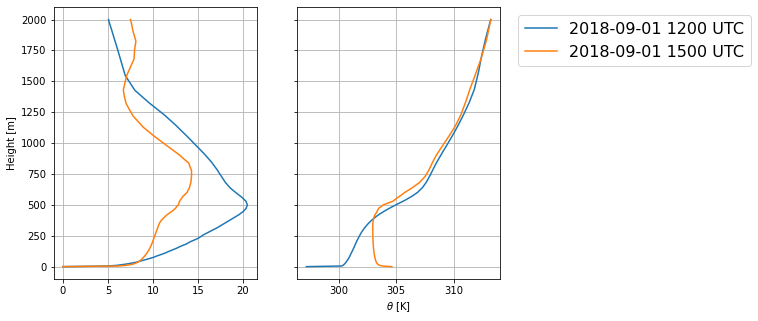

In [43]:
fig,ax = plot_profile(
    df_0901e,
    fields=['ws', 'theta'],
    times=['2018-09-01 12:00', '2018-09-01 15:00', '2018-09-01 18:00'],
    fieldlabels={'theta':r'$\theta$ [K]'},
    showlegend=True
)